In [1]:
import networkx as nx
import random
import time
from copy import deepcopy
import matplotlib.pyplot as plt

def initialize_pheromones(g):
    for u, v in g.edges():
        g[u][v]['pheromones'] = 1.0
    
    for node in g.nodes():
        g.nodes[node]['pheromones'] = 0.1  # Setting a small initial value for nodes

def construct_solution(g):
    coloring = {}
    uncolored_nodes = list(g.nodes())
    
    for node in uncolored_nodes:
        used_colors = set(coloring.get(neighbor, None) for neighbor in g.neighbors(node))
        available_colors = [c for c in range(len(uncolored_nodes)) if c not in used_colors]  # Adjusting number of colors dynamically
        chosen_color = min(available_colors)
        coloring[node] = chosen_color
        
    return coloring
    
def evaluate_coloring(g, coloring):
    conflicts = 0
    for u, v in g.edges():
        if coloring[u] == coloring[v]:
            conflicts += 1
    return conflicts / 2  # Each conflict is counted twice

def map_colors(coloring):
    color_map = {}
    next_color = 0
    for node in coloring:
        color = coloring[node]
        if color not in color_map:
            color_map[color] = next_color
            next_color += 1
    return [color_map[color] for color in coloring.values()]

def aco_graph_coloring(g, num_ants, rho, num_iterations):
    initialize_pheromones(g)
    best_coloring = None
    smallest_conflicts = float('inf')
    conflicts_history = []

    for _ in range(num_iterations):
        for _ in range(num_ants):
            coloring = construct_solution(g)
            conflicts = evaluate_coloring(g, coloring)
            if conflicts < smallest_conflicts:
                best_coloring = deepcopy(coloring)
                smallest_conflicts = conflicts
        conflicts_history.append(smallest_conflicts)
        
        # Evaporation
        for u, v in g.edges():
            g[u][v]['pheromones'] *= rho

        # Update pheromones
        for u, v in g.edges():
            if best_coloring[u] != best_coloring[v]:
                g[u][v]['pheromones'] += 1.0 / (smallest_conflicts + 1)  # Adding 1 to avoid ZeroDivisionError

    return best_coloring, smallest_conflicts

Best coloring: {'A': 0, 'B': 1, 'C': 2, 'D': 0}
Smallest conflicts: 0.0


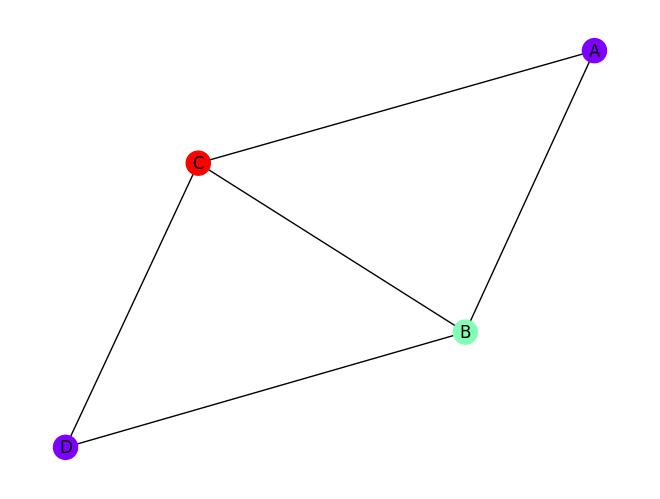

Minimalan broj boja: 3
Execution time: 0.20413589477539062 seconds


In [2]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
# Converting to NetworkX graph

g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800
start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small1.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "w") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 0, 'F': 0, 'G': 1, 'H': 1, 'I': 2, 'J': 0}
Smallest conflicts: 0.0


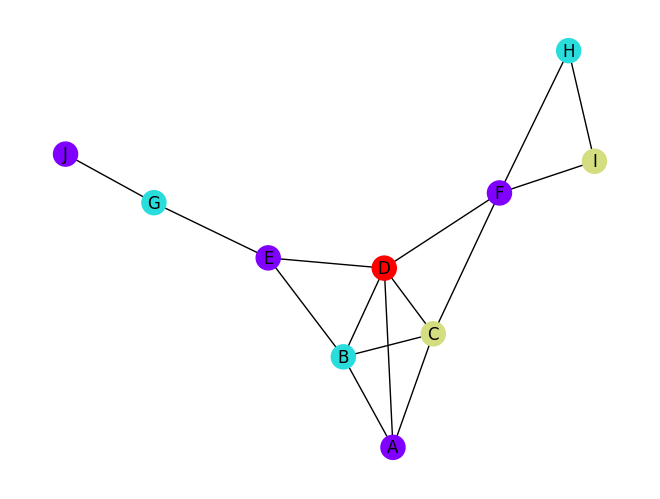

Minimalan broj boja: 4
Execution time: 0.45145106315612793 seconds


In [3]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small2.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {1: 0, 16: 1, 20: 1, 94: 2, 80: 3, 57: 3, 62: 4, 89: 2, 113: 4, 5: 1, 21: 1, 15: 1, 2: 0, 24: 1, 30: 2, 77: 3, 92: 4, 41: 1, 55: 3, 6: 2, 54: 5, 3: 0, 100: 1, 44: 1, 105: 2, 91: 3, 42: 4, 103: 5, 90: 6, 22: 7, 67: 8, 31: 1, 115: 1, 71: 2, 4: 0, 38: 2, 85: 2, 49: 1, 50: 2, 61: 3, 63: 4, 99: 5, 96: 6, 84: 1, 107: 7, 12: 1, 56: 0, 26: 2, 72: 3, 32: 0, 76: 4, 34: 5, 53: 0, 11: 0, 87: 5, 13: 4, 14: 6, 60: 7, 7: 0, 66: 2, 83: 2, 118: 3, 48: 4, 10: 5, 120: 6, 25: 7, 75: 8, 64: 3, 28: 1, 51: 3, 8: 3, 73: 4, 18: 5, 86: 6, 104: 5, 98: 4, 46: 0, 9: 0, 33: 5, 69: 2, 58: 3, 116: 1, 17: 3, 70: 4, 101: 4, 119: 4, 35: 0, 36: 2, 117: 3, 19: 2, 43: 5, 102: 4, 23: 6, 88: 6, 97: 7, 68: 5, 29: 0, 95: 3, 52: 2, 65: 2, 59: 0, 108: 5, 39: 5, 37: 4, 112: 6, 47: 5, 27: 0, 79: 5, 93: 7, 114: 5, 74: 1, 109: 7, 106: 0, 110: 2, 78: 1, 111: 6, 81: 3, 40: 5, 82: 7, 45: 8}
Smallest conflicts: 0.0


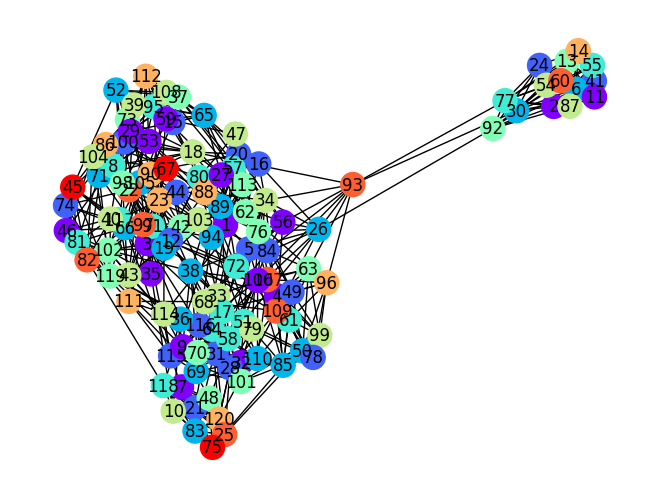

Minimalan broj boja: 9
Execution time: 23.327736616134644 seconds


In [4]:
graph = nx.Graph()
with open('../File/games120.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("games120.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {1: 0, 2: 1, 4: 1, 7: 1, 9: 1, 13: 1, 15: 1, 18: 1, 20: 1, 25: 1, 27: 1, 30: 1, 32: 1, 36: 1, 38: 1, 41: 1, 43: 1, 49: 1, 51: 1, 54: 1, 56: 1, 60: 1, 62: 1, 65: 1, 67: 1, 72: 1, 74: 1, 77: 1, 79: 1, 83: 1, 85: 1, 88: 1, 90: 1, 97: 1, 99: 1, 102: 1, 104: 1, 108: 1, 110: 1, 113: 1, 115: 1, 120: 1, 122: 1, 125: 1, 127: 1, 131: 1, 133: 1, 136: 1, 138: 1, 144: 1, 146: 1, 149: 1, 151: 1, 155: 1, 157: 1, 160: 1, 162: 1, 167: 1, 169: 1, 172: 1, 174: 1, 178: 1, 180: 1, 183: 1, 185: 1, 3: 0, 6: 0, 8: 0, 12: 0, 14: 0, 17: 0, 19: 0, 24: 0, 26: 0, 29: 0, 31: 0, 35: 0, 37: 0, 40: 0, 42: 0, 48: 0, 50: 0, 53: 0, 55: 0, 59: 0, 61: 0, 64: 0, 66: 0, 71: 0, 73: 0, 76: 0, 78: 0, 82: 0, 84: 0, 87: 0, 89: 0, 96: 0, 98: 0, 101: 0, 103: 0, 107: 0, 109: 0, 112: 0, 114: 0, 119: 0, 121: 0, 124: 0, 126: 0, 130: 0, 132: 0, 135: 0, 137: 0, 143: 0, 145: 0, 148: 0, 150: 0, 154: 0, 156: 0, 159: 0, 161: 0, 166: 0, 168: 0, 171: 0, 173: 0, 177: 0, 179: 0, 182: 0, 184: 0, 5: 2, 10: 2, 16: 2, 21: 2, 28: 2, 33

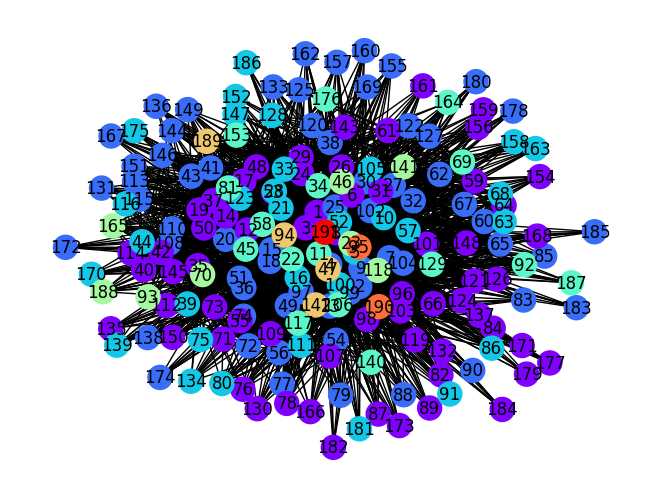

Minimalan broj boja: 8
Execution time: 52.57383465766907 seconds


In [5]:
graph = nx.Graph()
with open('../File/myciel7.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("myciel7.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 33: 16, 36: 17, 41: 18, 43: 19, 45: 20, 47: 18, 48: 21, 51: 22, 54: 23, 56: 16, 57: 21, 59: 24, 60: 25, 61: 24, 70: 16, 71: 16, 72: 16, 73: 16, 74: 16, 75: 16, 76: 16, 77: 16, 78: 16, 80: 16, 82: 16, 85: 16, 87: 16, 89: 16, 90: 17, 91: 16, 95: 19, 97: 18, 102: 24, 103: 24, 104: 25, 105: 24, 106: 24, 113: 25, 116: 26, 117: 27, 118: 26, 120: 26, 121: 25, 122: 26, 123: 26, 124: 16, 125: 16, 126: 16, 127: 16, 128: 18, 129: 19, 130: 20, 131: 21, 132: 22, 133: 23, 134: 24, 135: 25, 141: 26, 142: 26, 143: 26, 144: 26, 147: 22, 148: 22, 149: 24, 151: 24, 157: 26, 158: 27, 159: 26, 160: 26, 161: 21, 162: 16, 163: 16, 165: 26, 167: 16, 168: 26, 169: 26, 170: 27, 171: 27, 172: 27, 173: 28, 174: 28, 175: 27, 176: 26, 177: 26, 178: 20, 179: 20, 180: 20, 181: 20, 185: 16, 186: 26, 187: 27, 188: 21, 189: 28, 190: 28, 191: 28, 192: 29, 193: 28, 194: 29, 195: 27, 196: 16, 197: 16

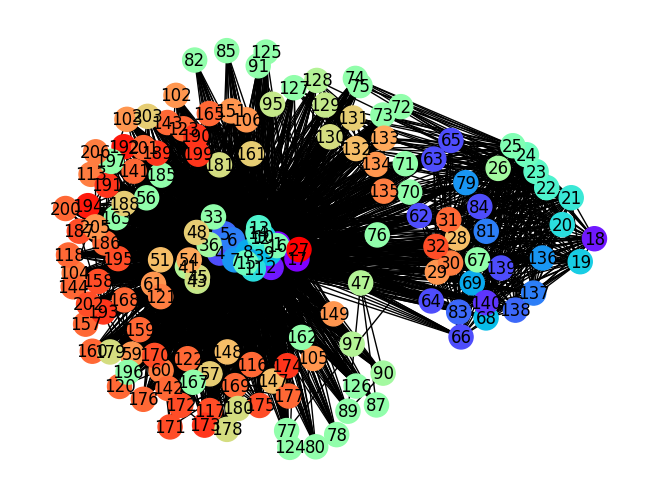

Minimalan broj boja: 31
Execution time: 46.72566533088684 seconds


In [6]:
graph = nx.Graph()
with open('../File/fajl2.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("fajl2.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {2: 0, 1: 1, 3: 1, 5: 1, 4: 0, 6: 2, 7: 2, 8: 3, 9: 3, 10: 4, 11: 0, 12: 5, 13: 6, 14: 5, 15: 2, 16: 6, 17: 3, 18: 1, 19: 3, 20: 2, 21: 7, 22: 4, 23: 8, 24: 6, 25: 2, 26: 5, 27: 4, 28: 9, 29: 6, 30: 5, 31: 4, 32: 4, 33: 7, 34: 8, 35: 10, 36: 9, 37: 11, 38: 8, 39: 11, 40: 10, 41: 12, 42: 12, 43: 7, 44: 4, 45: 8, 46: 11, 47: 13, 48: 13, 49: 13, 50: 9, 51: 14, 52: 9, 53: 10, 54: 15, 55: 4, 56: 0, 57: 5, 58: 16, 59: 9, 60: 8, 61: 14, 62: 13, 63: 14, 64: 2, 65: 12, 66: 3, 67: 17, 68: 1, 69: 16, 70: 11, 71: 18, 72: 0, 73: 14, 74: 14, 75: 6, 76: 17, 77: 12, 78: 15, 79: 16, 80: 2, 81: 12, 82: 19, 83: 10, 84: 15, 85: 17, 86: 19, 87: 18, 88: 20, 89: 6, 90: 4, 91: 18, 92: 17, 93: 11, 94: 12, 95: 16, 96: 17, 97: 15, 98: 9, 99: 15, 100: 7, 101: 20, 102: 14, 103: 7, 104: 20, 105: 21, 106: 10, 107: 10, 108: 14, 109: 9, 110: 13, 111: 20, 112: 8, 113: 21, 114: 19, 115: 0, 116: 18, 117: 22, 118: 23, 119: 24, 120: 22, 121: 4, 122: 21, 123: 16, 124: 13, 125: 23, 126: 11, 127: 21, 128: 1, 12

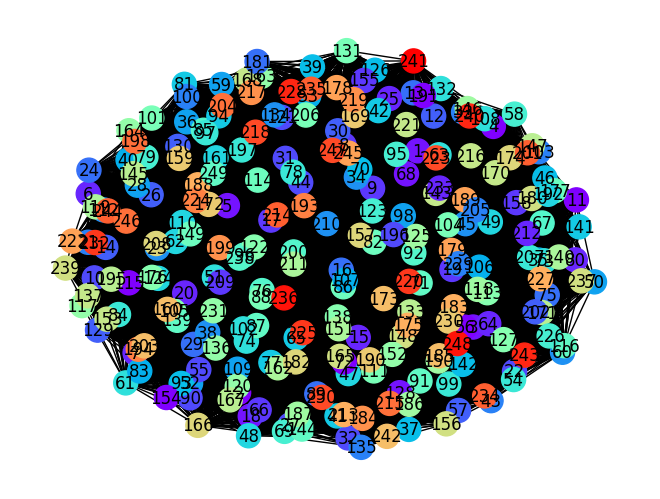

Minimalan broj boja: 42
Execution time: 179.40248584747314 seconds


In [7]:
graph = nx.Graph()
with open('../File/test1.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("test1.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

In [8]:
graph = nx.Graph()
with open('../File/test2.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
#nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
#plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("test2.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {6: 0, 2: 1, 8: 0, 3: 1, 4: 1, 7: 1, 9: 0, 10: 0, 5: 1, 11: 0, 12: 2, 13: 0, 14: 0, 15: 2, 16: 1, 17: 1, 1: 0, 20: 2, 22: 1, 24: 1, 25: 0, 21: 1, 26: 2, 27: 1, 28: 1, 29: 0, 23: 1, 30: 3, 31: 3, 18: 0, 32: 2, 33: 2, 34: 3, 35: 2, 36: 0, 37: 3, 38: 1, 39: 4, 40: 2, 41: 3, 19: 0, 42: 3, 43: 0, 44: 1, 45: 3, 46: 2, 47: 4, 48: 2, 49: 0, 50: 4, 51: 1, 52: 2, 53: 0, 54: 4, 55: 3, 56: 0, 57: 5, 58: 1, 59: 4, 60: 3, 61: 4, 62: 5, 63: 0, 64: 3, 65: 0, 66: 2, 67: 4, 68: 3, 69: 2, 70: 2, 71: 2, 72: 5, 73: 4, 74: 1, 75: 5, 76: 0, 77: 2, 78: 0, 79: 1, 80: 4, 81: 2, 82: 0, 83: 1, 84: 5, 85: 5, 86: 4, 87: 5, 88: 3, 89: 3, 90: 5, 91: 5, 92: 6, 93: 3, 94: 3, 95: 1, 96: 3, 97: 2, 98: 6, 99: 2, 100: 0, 101: 6, 102: 5, 103: 2, 104: 1, 105: 5, 106: 5, 107: 3, 108: 4, 109: 6, 110: 4, 111: 4, 112: 4, 113: 6, 114: 0, 115: 3, 116: 2, 117: 6, 118: 0, 119: 2, 120: 4, 121: 5, 122: 4, 123: 7, 124: 3, 125: 3, 126: 4, 127: 6, 128: 3, 129: 5, 130: 7, 131: 3, 132: 4, 133: 1, 134: 1, 135: 8, 136: 8, 137:

Best coloring: {1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 0, 11: 0}
Smallest conflicts: 0.0


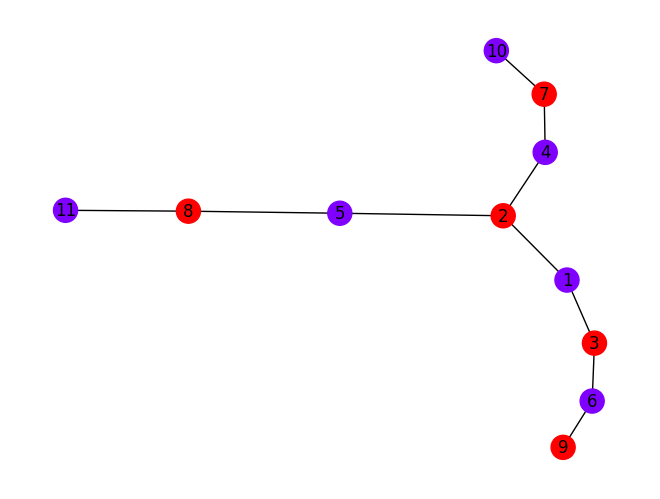

Minimalan broj boja: 2
Execution time: 0.5132536888122559 seconds


In [9]:
graph = nx.Graph()
with open('../File/test4.txt', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'e':
            graph.add_edge(int(parts[1]), int(parts[2]))

# Converting to NetworkX graph
g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800

start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("test4.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 0}
Smallest conflicts: 0.0


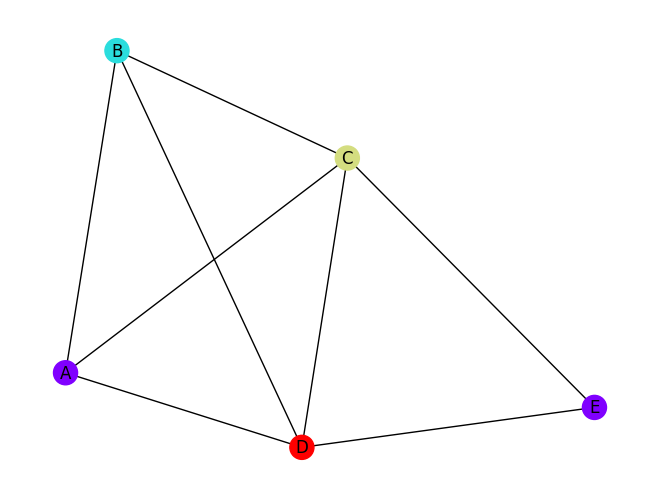

Minimalan broj boja: 4
Execution time: 0.33202052116394043 seconds


In [10]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'B', 'C', 'E'],
    'E': ['C', 'D']
}
# Converting to NetworkX graph

g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800
start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small3.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {'A': 0, 'B': 1, 'C': 2, 'D': 0, 'E': 0}
Smallest conflicts: 0.0


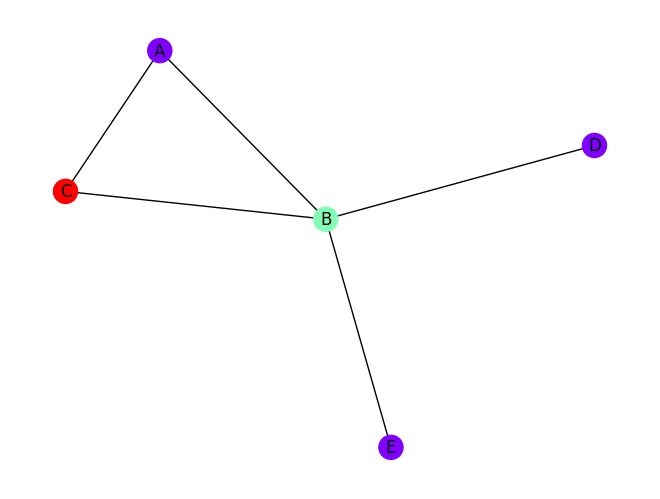

Minimalan broj boja: 3
Execution time: 0.171173095703125 seconds


In [11]:
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['A', 'B'],
    'D' : ['B'],
    'E' : ['B']
}
# Converting to NetworkX graph

g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800
start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small4.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 0, 'F': 0, 'G': 3}
Smallest conflicts: 0.0


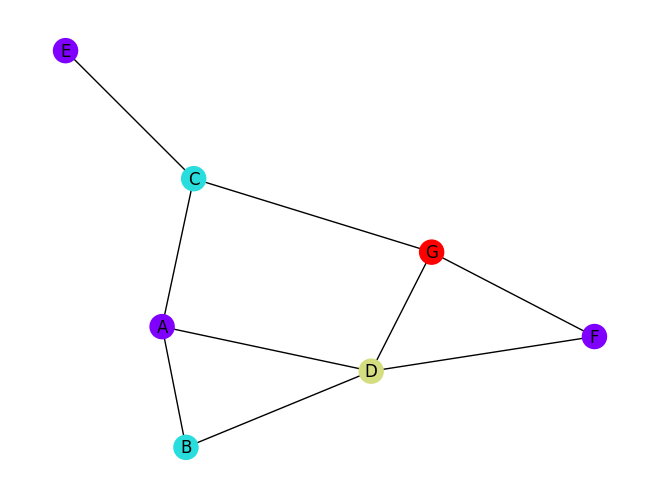

Minimalan broj boja: 4
Execution time: 0.3283402919769287 seconds


In [12]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'G'],
    'D': ['A', 'B', 'F', 'G'],
    'E': ['C'],
    'F': ['D', 'G'],
    'G': ['C', 'D', 'F']
}
# Converting to NetworkX graph

g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800
start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small5.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")

Best coloring: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
Smallest conflicts: 0.0


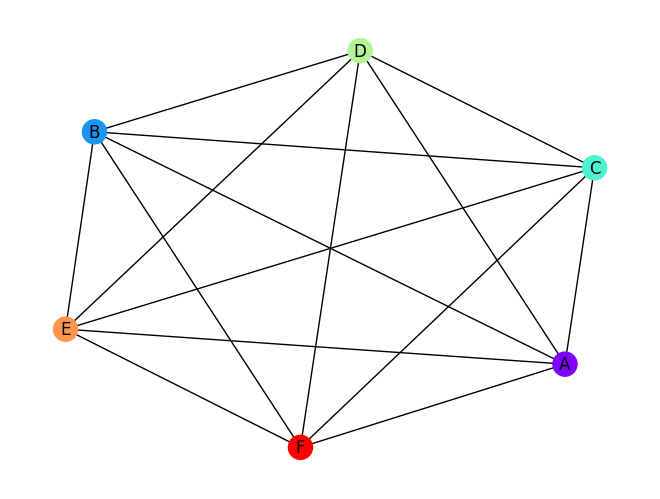

Minimalan broj boja: 6
Execution time: 0.35816144943237305 seconds


In [13]:
graph = {
    'A': ['B', 'F', 'D', 'E'],
    'B': ['A', 'C', 'E', 'F'],
    'C': ['B', 'D', 'F', 'A'],
    'D': ['C', 'E', 'A', 'B'],
    'E': ['D', 'F', 'B', 'C'],
    'F': ['E', 'A', 'C', 'D']
}
# Converting to NetworkX graph

g = nx.Graph(graph)

# Parameters
num_ants = 30
rho = 0.9
num_iterations = 800
start_time = time.time()
best_coloring, smallest_conflicts = aco_graph_coloring(g, num_ants, rho, num_iterations)
end_time = time.time()

print("Best coloring:", best_coloring)
print("Smallest conflicts:", smallest_conflicts)

# Mapiranje boja
colors_mapped = map_colors(best_coloring)

# Crtanje grafa sa korigovanim bojama
nx.draw(g, with_labels=True, node_color=colors_mapped, cmap=plt.cm.rainbow)
plt.show()

# Broj minimalnih boja za bojenje grafa
num_colors_used = len(set(best_coloring.values()))
print("Minimalan broj boja:", num_colors_used)

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

podaci=[]
podaci.append("small6.txt")
podaci.append("Broj boja: "+str(num_colors_used))
podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

with open("../Rezultati/aco.txt", "a") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")